# United States Broadband Availability - Availability Classification for October 2020

Members: Angelo RR Fernando P. Oppus, Rafael Enrique T. Sabile, Jainie Angel Jhem M. Yumul

Dataset URL: https://datahub.io/collections/broadband

## I. Import Libraries, Preferences, and Helper Functions

### LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

### PREFERENCES

In [2]:
# Suppress warnings
warnings.filterwarnings('ignore')

# Set the default Seaborn style
sns.set_theme(style='whitegrid', font='serif')

# Dataset
dataset = 'https://raw.githubusercontent.com/microsoft/USBroadbandUsagePercentages/refs/heads/master/dataset/broadband_data_2020October.csv'

### Helper Functions

In [3]:
#

## II. Exploratory Data Analysis

In [4]:
# Load dataset
broadband = pd.read_csv(dataset)

# Preview first five rows
broadband.head()

,ST,COUNTY ID,COUNTY NAME,BROADBAND AVAILABILITY PER FCC,BROADBAND USAGE
0,AL,1001,Autauga County,0.8057,0.391
1,AL,1003,Baldwin County,0.8362,0.452
2,AL,1005,Barbour County,0.6891,0.324
3,AL,1007,Bibb County,0.3368,0.136
4,AL,1009,Blount County,0.758,0.199


In [5]:
# Determine data dimensionality, feature names, and feature types.
broadband.shape

(3142, 5)

In [6]:
# Show columns
broadband.columns

Index(['ST', 'COUNTY ID', 'COUNTY NAME', ' BROADBAND AVAILABILITY PER FCC ',
       ' BROADBAND USAGE '],
      dtype='object')

In [7]:
# Dataset General Info
broadband.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   ST                                3142 non-null   object
 1   COUNTY ID                         3142 non-null   int64 
 2   COUNTY NAME                       3142 non-null   object
 3    BROADBAND AVAILABILITY PER FCC   3142 non-null   object
 4    BROADBAND USAGE                  3142 non-null   object
dtypes: int64(1), object(4)
memory usage: 122.9+ KB


In [8]:
# Show statistical characteristics
broadband.describe()

,COUNTY ID
count,3142.000000
mean,30383.649268
std,15162.508374
min,1001.000000
25%,18177.500000
50%,29176.000000
75%,45080.500000
max,56045.000000


In [9]:
# Show statistical characteristics of non-numerical features
broadband.describe(include=["object"])

,ST,COUNTY NAME,BROADBAND AVAILABILITY PER FCC,BROADBAND USAGE
count,3142,3142,3142,3142
unique,51,1877,1875,841
top,TX,Washington County,1,0.168
freq,254,30,238,11


In [10]:
# Check for missing values
broadband.isnull().sum()

ST                                  0
COUNTY ID                           0
COUNTY NAME                         0
 BROADBAND AVAILABILITY PER FCC     0
 BROADBAND USAGE                    0
dtype: int64

Visualization of graphs for the dataset is currently not possible as the dataset produces errors relating to column formatting and other issues. Dataset cleaning, preprocessing, and feature engineering must be conducted.

## III. Data Cleaning and Preprocessing

In [11]:
# Removing leading/trailing whitespaces from column names
broadband.columns = broadband.columns.str.strip()

In [12]:
# Convert BROADBAND AVAILABILITY PER FCC and BROADBAND USAGE to numeric data types
broadband['BROADBAND AVAILABILITY PER FCC'] = pd.to_numeric(broadband['BROADBAND AVAILABILITY PER FCC'], errors='coerce')
broadband['BROADBAND USAGE'] = pd.to_numeric(broadband['BROADBAND USAGE'], errors='coerce')

# Drop rows with missing values in BROADBAND AVAILABILITY PER FCC and BROADBAND USAGE
broadband_new = broadband.dropna(subset=['BROADBAND AVAILABILITY PER FCC', 'BROADBAND USAGE'])

# Generate broadband availability categories: high (>0.75), medium (0.5-0.75), low (<0.5)
broadband_new['AVAILABILITY CATEGORY'] = pd.cut(
    broadband_new['BROADBAND AVAILABILITY PER FCC'], bins=[0, 0.5, 0.75, 1],
    labels=['Low', 'Medium', 'High'], include_lowest=True
)

# Calculate state-level averages for BROADBAND AVAILABILITY PER FCC and BROADBAND USAGE
state_averages = broadband_new.groupby('ST')[['BROADBAND AVAILABILITY PER FCC', 'BROADBAND USAGE']].transform('mean')
broadband_new['STATE AVG AVAILABILITY'] = state_averages['BROADBAND AVAILABILITY PER FCC']
broadband_new['STATE AVG USAGE'] = state_averages['BROADBAND USAGE']

In [13]:
# Check preprocessed dataset
broadband_new.head()

,ST,COUNTY ID,COUNTY NAME,BROADBAND AVAILABILITY PER FCC,BROADBAND USAGE,AVAILABILITY CATEGORY,STATE AVG AVAILABILITY,STATE AVG USAGE
0,AL,1001,Autauga County,0.8057,0.391,High,0.703642,0.289597
1,AL,1003,Baldwin County,0.8362,0.452,High,0.703642,0.289597
2,AL,1005,Barbour County,0.6891,0.324,Medium,0.703642,0.289597
3,AL,1007,Bibb County,0.3368,0.136,Low,0.703642,0.289597
4,AL,1009,Blount County,0.7580,0.199,High,0.703642,0.289597


In [14]:
broadband_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3122 entries, 0 to 3141
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ST                              3122 non-null   object  
 1   COUNTY ID                       3122 non-null   int64   
 2   COUNTY NAME                     3122 non-null   object  
 3   BROADBAND AVAILABILITY PER FCC  3122 non-null   float64 
 4   BROADBAND USAGE                 3122 non-null   float64 
 5   AVAILABILITY CATEGORY           3122 non-null   category
 6   STATE AVG AVAILABILITY          3122 non-null   float64 
 7   STATE AVG USAGE                 3122 non-null   float64 
dtypes: category(1), float64(4), int64(1), object(2)
memory usage: 198.3+ KB


Dropna() was employed to be used for any detected missing values. isnull() showed that there were no missing values. Features 'BROADBAND AVAILABILITY FOR FCC' and 'BROADBAND USAGE' were changed from string to numeric data types. Additional features such as 'AVAILABILITY CATEGORY', 'STATE AVG AVAILABILITY', and 'STATE AVG USAGE' were also created for better accuracy and results.

## IV. Data Visualization

In [15]:
sns.set(style="whitegrid")

### Distribution of BROADBAND USAGE AND BROADBAND AVAILABILITY PER FCC

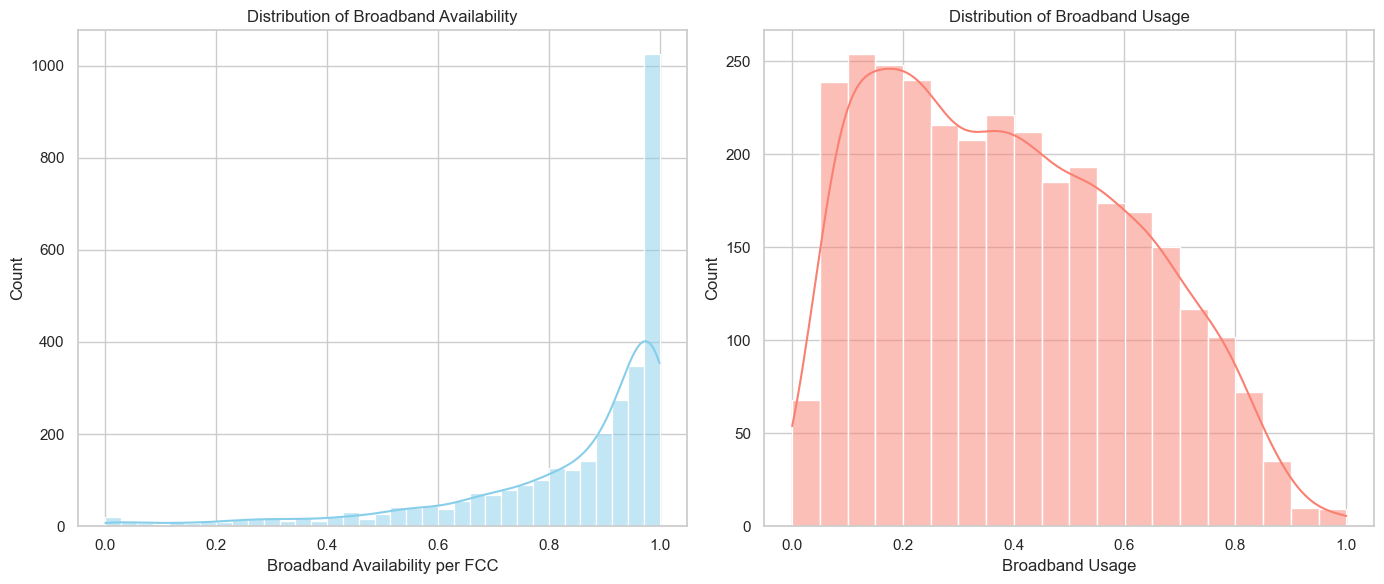

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(broadband_new['BROADBAND AVAILABILITY PER FCC'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Broadband Availability')
axes[0].set_xlabel('Broadband Availability per FCC')

sns.histplot(broadband_new['BROADBAND USAGE'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Broadband Usage')
axes[1].set_xlabel('Broadband Usage')

plt.tight_layout()
plt.show()

This chart illustrates the broadband usage and broadband availability between the different counties.

### BROADBAND AVAILABILITY CATEGORY COUNTS

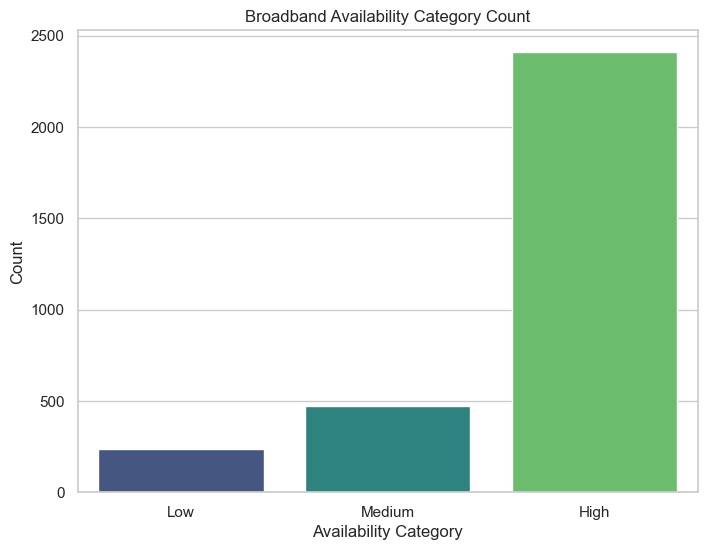

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='AVAILABILITY CATEGORY', data=broadband_new, palette='viridis')
plt.title('Broadband Availability Category Count')
plt.xlabel('Availability Category')
plt.ylabel('Count')
plt.show()

This chart categorizes the broadband availability category count.

### State-level Averages of BROADBAND AVAILABILITY and BROADBAND USAGE

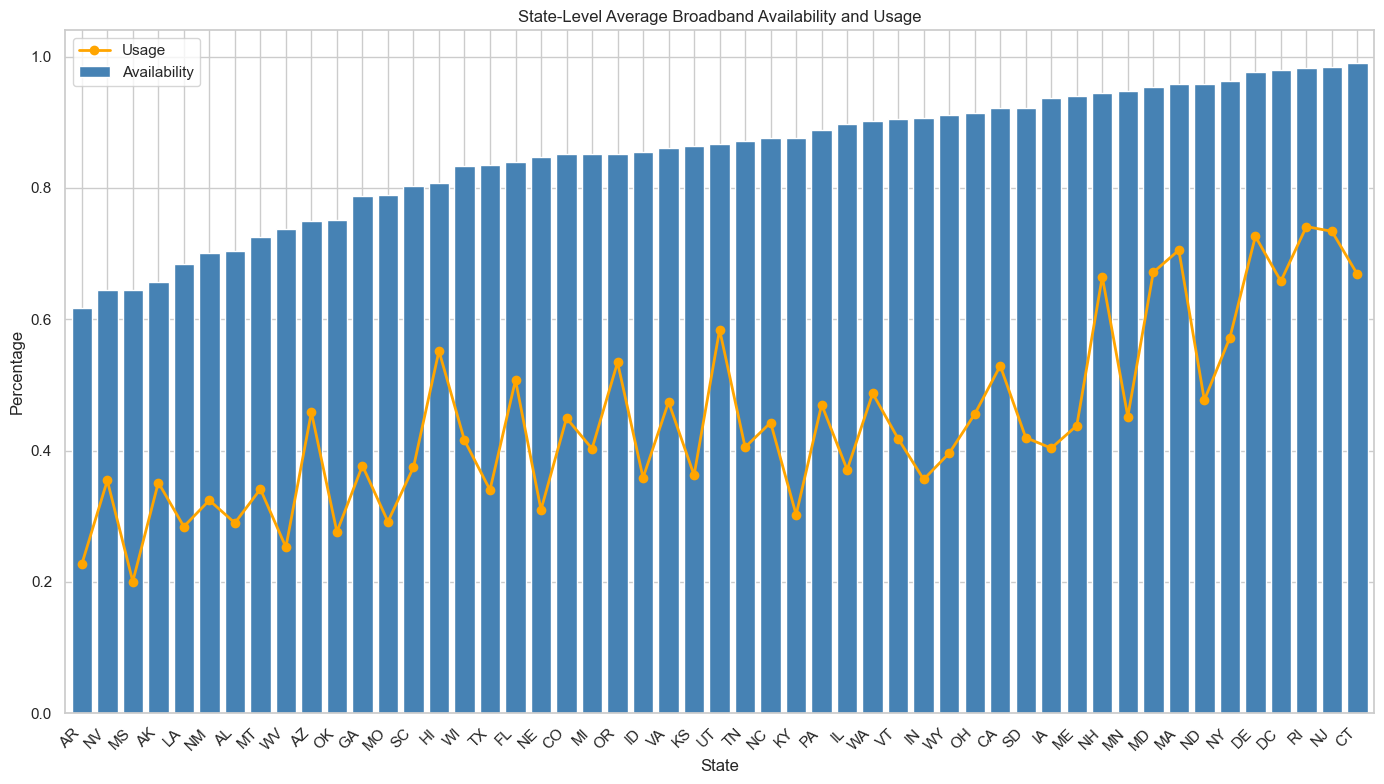

In [18]:
state_availability_usage = broadband_new.groupby('ST')[['STATE AVG AVAILABILITY', 'STATE AVG USAGE']].mean().sort_values('STATE AVG AVAILABILITY')

plt.figure(figsize=(14, 8))
state_availability_usage['STATE AVG AVAILABILITY'].plot(kind='bar', width=0.8, color='steelblue', label='Availability')
state_availability_usage['STATE AVG USAGE'].plot(kind='line', color='orange', linewidth=2, marker='o', label='Usage')
plt.xticks(rotation=45, ha='right')

plt.title('State-Level Average Broadband Availability and Usage')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.legend()
plt.tight_layout()
plt.show()



This chart shows the average broadband availability and usage in each state.

### BROADBAND AVAILABILITY PER FCC and BROADBAND USAGE SCATTER PLOT

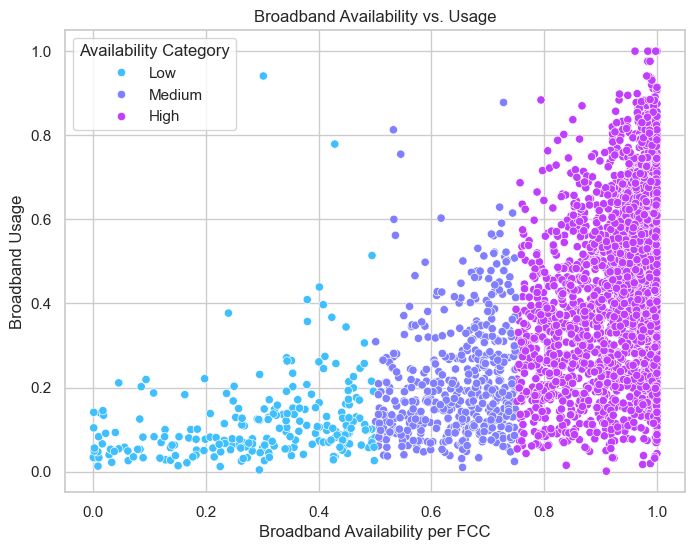

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BROADBAND AVAILABILITY PER FCC', y='BROADBAND USAGE', data=broadband_new, hue='AVAILABILITY CATEGORY', palette='cool')
plt.title('Broadband Availability vs. Usage')
plt.xlabel('Broadband Availability per FCC')
plt.ylabel('Broadband Usage')
plt.legend(title='Availability Category')
plt.show()


This illustration shows the relationship between the broadband availability and usage.

## V. Model Development

In [20]:
# Encode categorical variables
label_encoder = LabelEncoder()
broadband_new['ST'] = label_encoder.fit_transform(broadband_new['ST'])
broadband_new['COUNTY NAME'] = label_encoder.fit_transform(broadband_new['COUNTY NAME'])
broadband_new['AVAILABILITY CATEGORY'] = label_encoder.fit_transform(broadband_new['AVAILABILITY CATEGORY'])

# Separate features and target
X = broadband_new.drop(columns=['AVAILABILITY CATEGORY'])
y = broadband_new['AVAILABILITY CATEGORY']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## VI. Model Evaluation

In [21]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\n{'='*20} {model_name} {'='*20}")
    # Train model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


==================== Logistic Regression ====================
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       472
           1       1.00      0.96      0.98        55
           2       0.98      0.97      0.97        98

    accuracy                           0.99       625
   macro avg       0.99      0.98      0.98       625
weighted avg       0.99      0.99      0.99       625


==================== Random Forest ====================
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       472
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        98

    accuracy                           1.00       625
   macro avg       1.00      1.00      1.00       625
weighted avg       1.00      1.00      1.00       625


==================== SVM ================